In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the csv file using 'read_csv'.
df = pd.read_csv(r"C:\Users\nidhi_000\Downloads\application_data.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Determining the shape of the datset

df.shape

(307511, 122)

In [5]:
# Cleaning the missing data

# Columns with null values having more than 30%

emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

So there are 64 columns having null value greater than 30% in the dataset.

In [6]:
# Removing those 64 columns

emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


In [7]:
# Checking the columns having less null percentage(<30%)

df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [8]:
# Filling missing values with median

values=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [9]:
#Column for null values

df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [10]:
# Removing rows having null values greater than or equal to 30%

emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(df)].index)
df.drop(labels=emptyrow,axis=1,inplace=True)
print(len(emptyrow))

0


In [11]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Removing the unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(labels=unwanted,axis=1,inplace=True)

In [13]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [14]:
# For Gender column

df[df['CODE_GENDER']=='XNA'].shape

(4, 28)

In [15]:
# For Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [16]:
# Check for the number of females and males in gender column

df['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
# Updating the column 'CODE_GENDER' with "F" for the dataset for the missing values

df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [18]:
# For Organization column

df[df['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 28)

In [19]:
# Describing the organization type column

df['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

In [20]:
# Dropping the rows of total 55374 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [21]:
# Converting all the variable into numeric.

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [22]:
# Creating bins for AMT_INCOME_TOTAL

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [23]:
# Creating bins for AMT_CREDIT

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [24]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [25]:
target0_df.shape

(230302, 30)

In [26]:
target1_df.shape

(21835, 30)

In [27]:
#Imbalance percentage

round(len(target0_df)/len(target1_df),2)

10.55

#### Hence, the Imbalance Ratio is 10.55 

### Univariate Analysis for catogeries

In [28]:
#Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

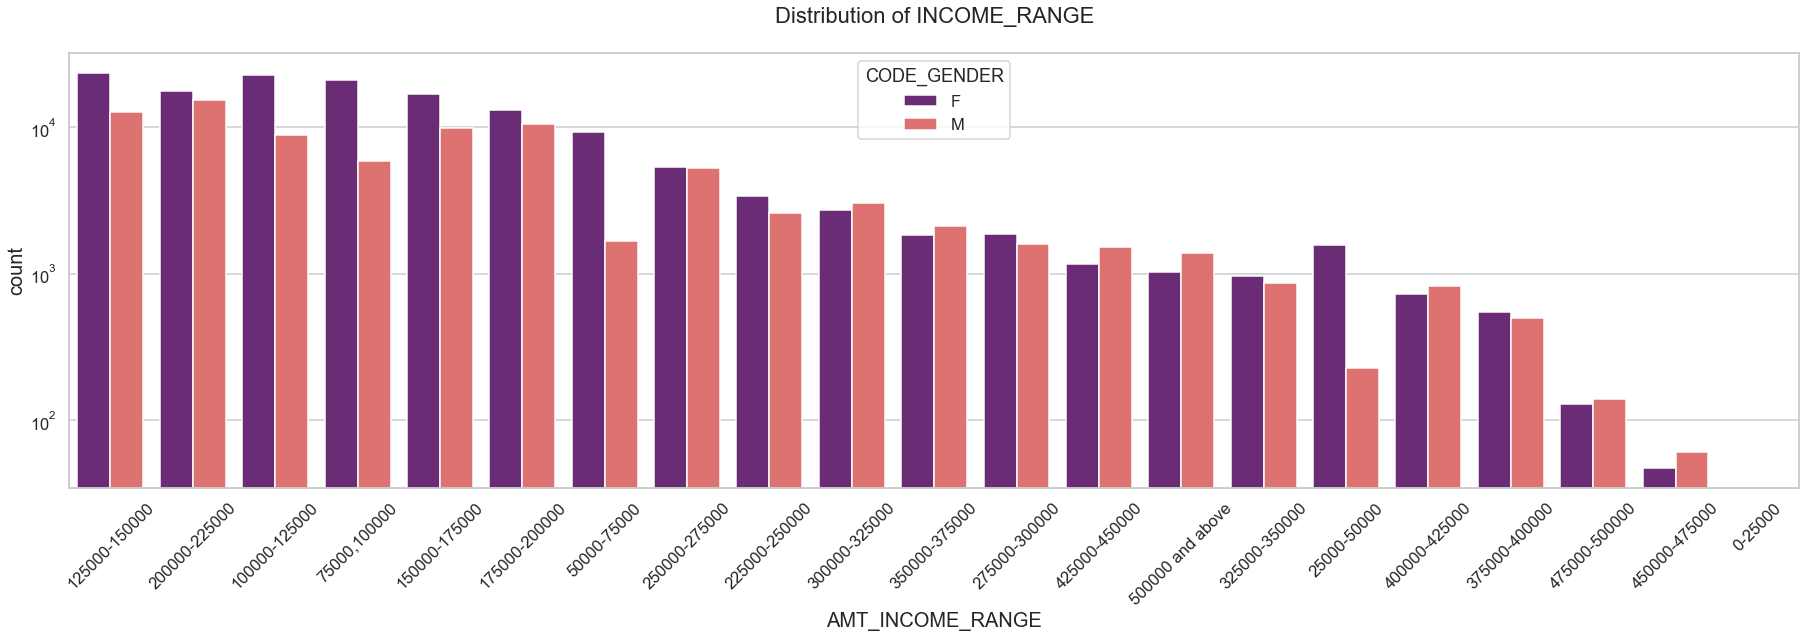

In [29]:
# PLotting for AMT_INCOME_RANGE

uniplot(target0_df,col='AMT_INCOME_RANGE',title='Distribution of INCOME_RANGE',hue='CODE_GENDER')

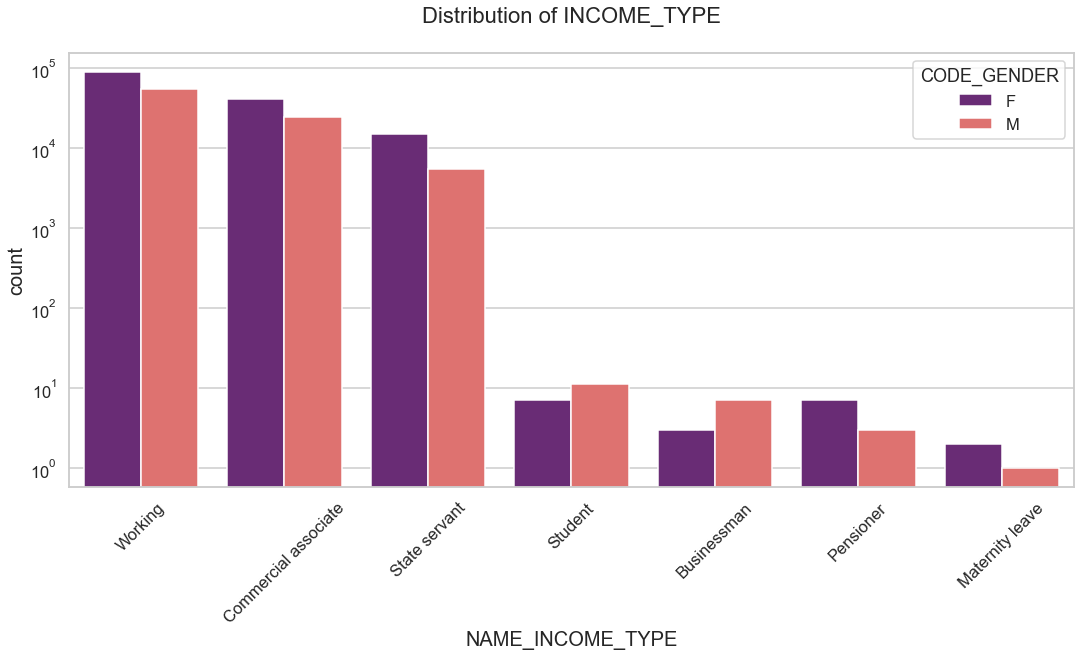

In [30]:
# Plotting for NAME_INCOME_TYPE

uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of INCOME_TYPE',hue='CODE_GENDER')

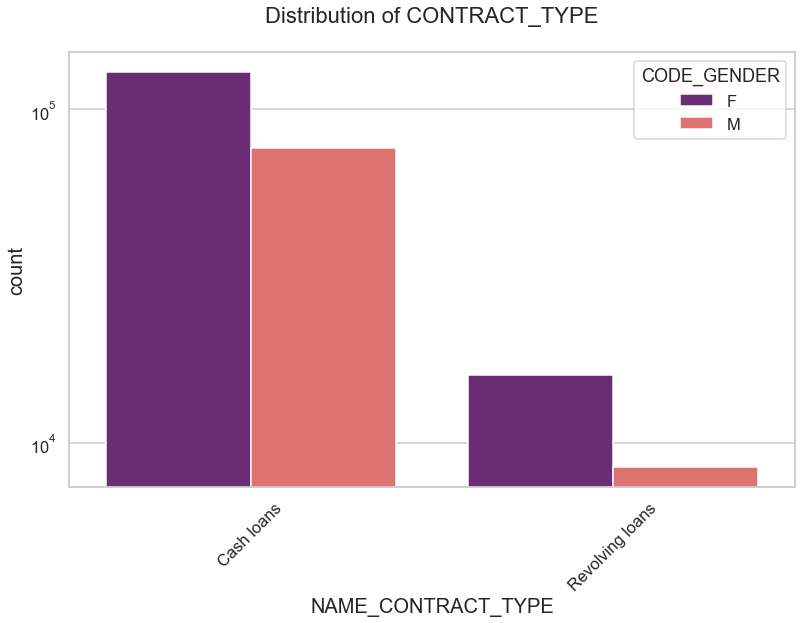

In [31]:
# Plotting for NAME_CONTRACT_TYPE 

uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='Distribution of CONTRACT_TYPE',hue='CODE_GENDER')

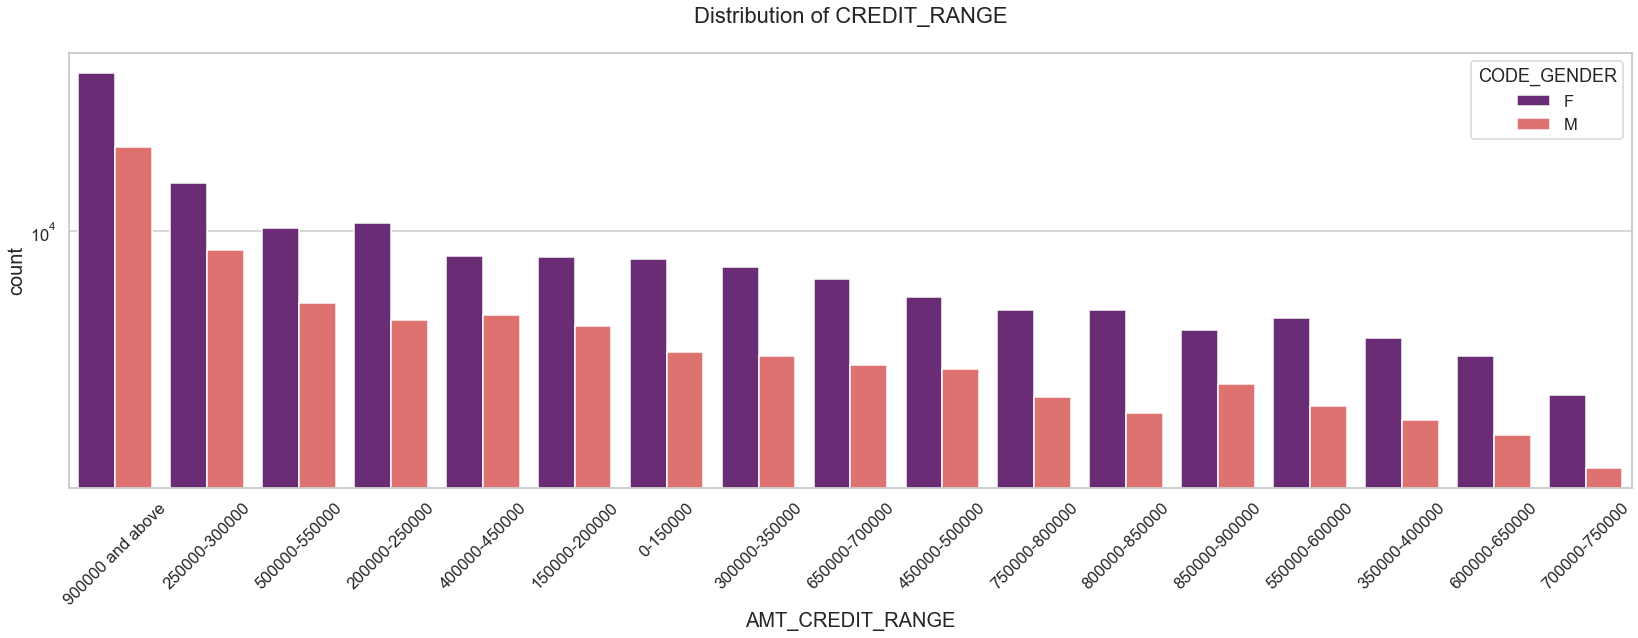

In [32]:
# Plotting for AMT_CREDIT_RANGE 

uniplot(target0_df,col='AMT_CREDIT_RANGE',title='Distribution of CREDIT_RANGE',hue='CODE_GENDER')

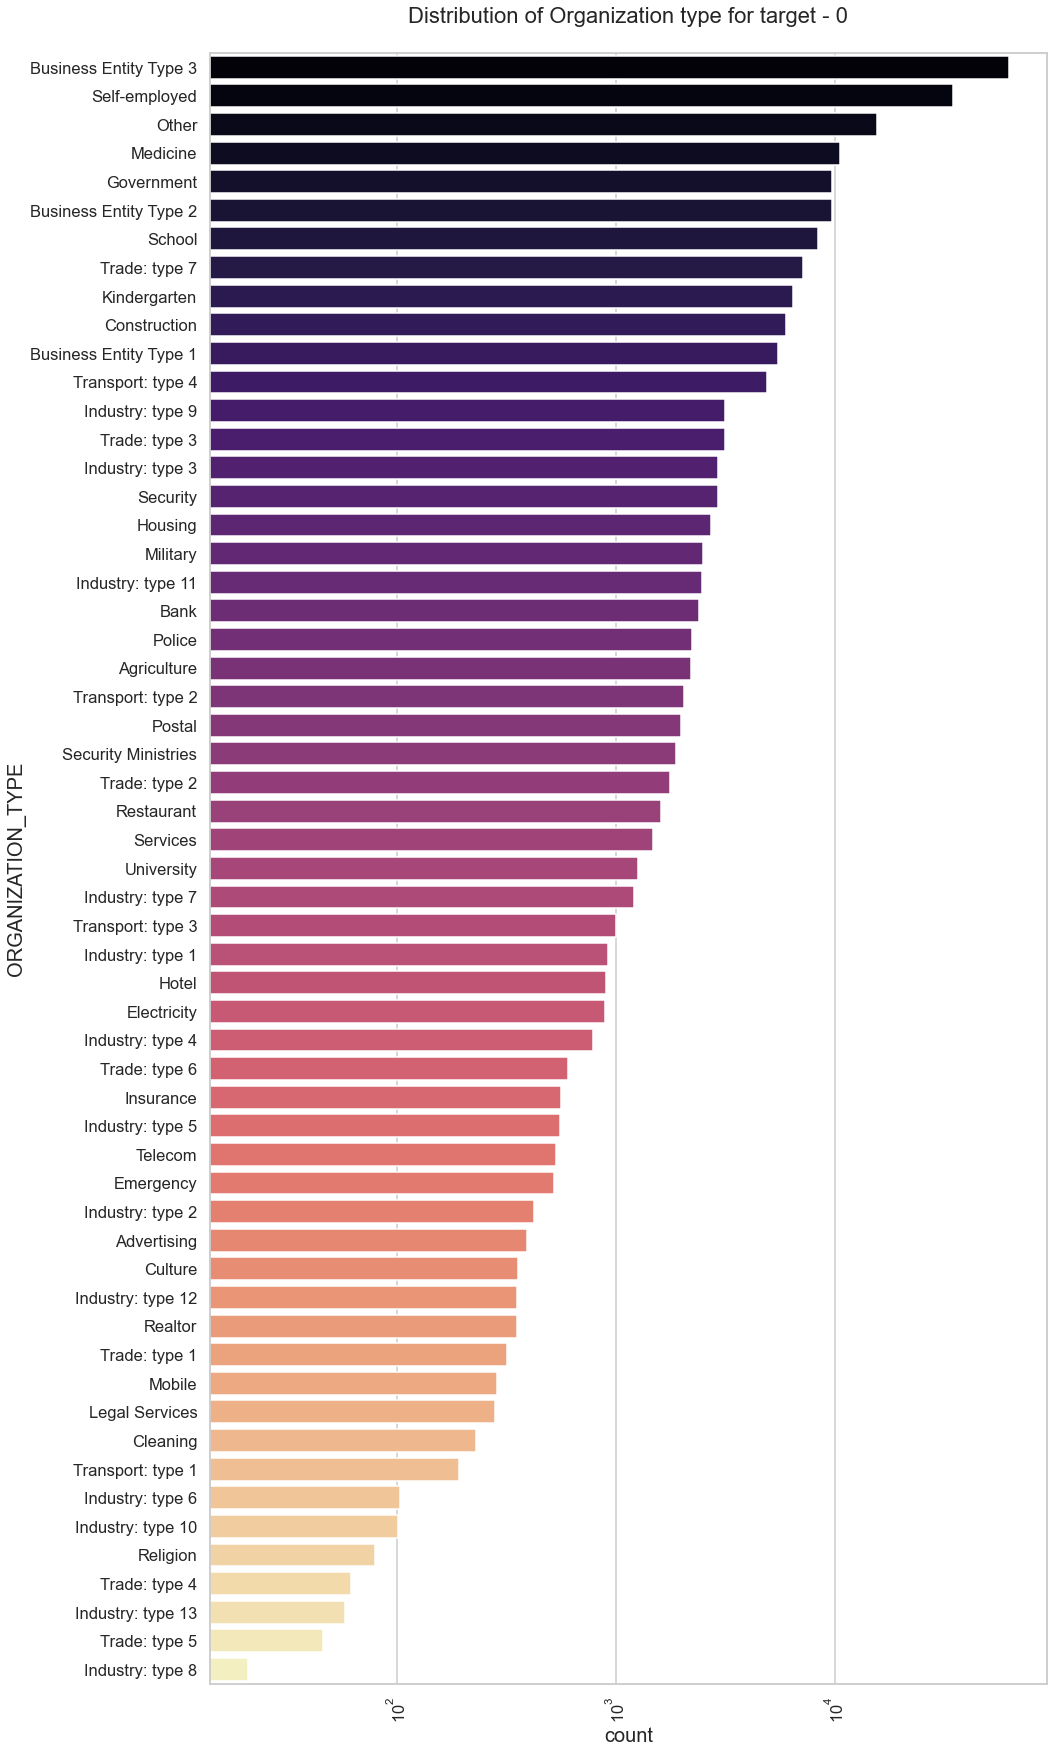

In [33]:
# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.show()

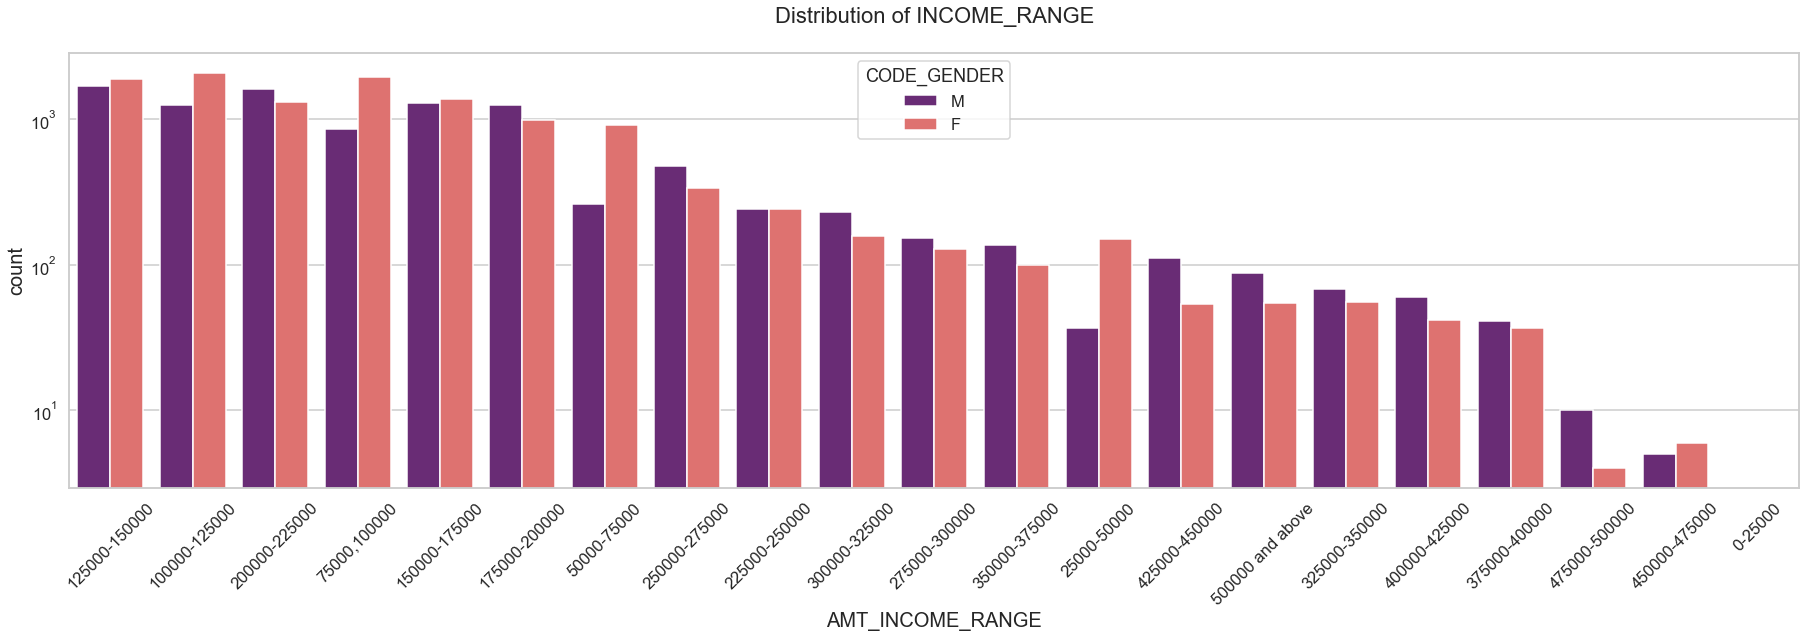

In [34]:
# PLotting for AMT_INCOME_RANGE

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of INCOME_RANGE',hue='CODE_GENDER')

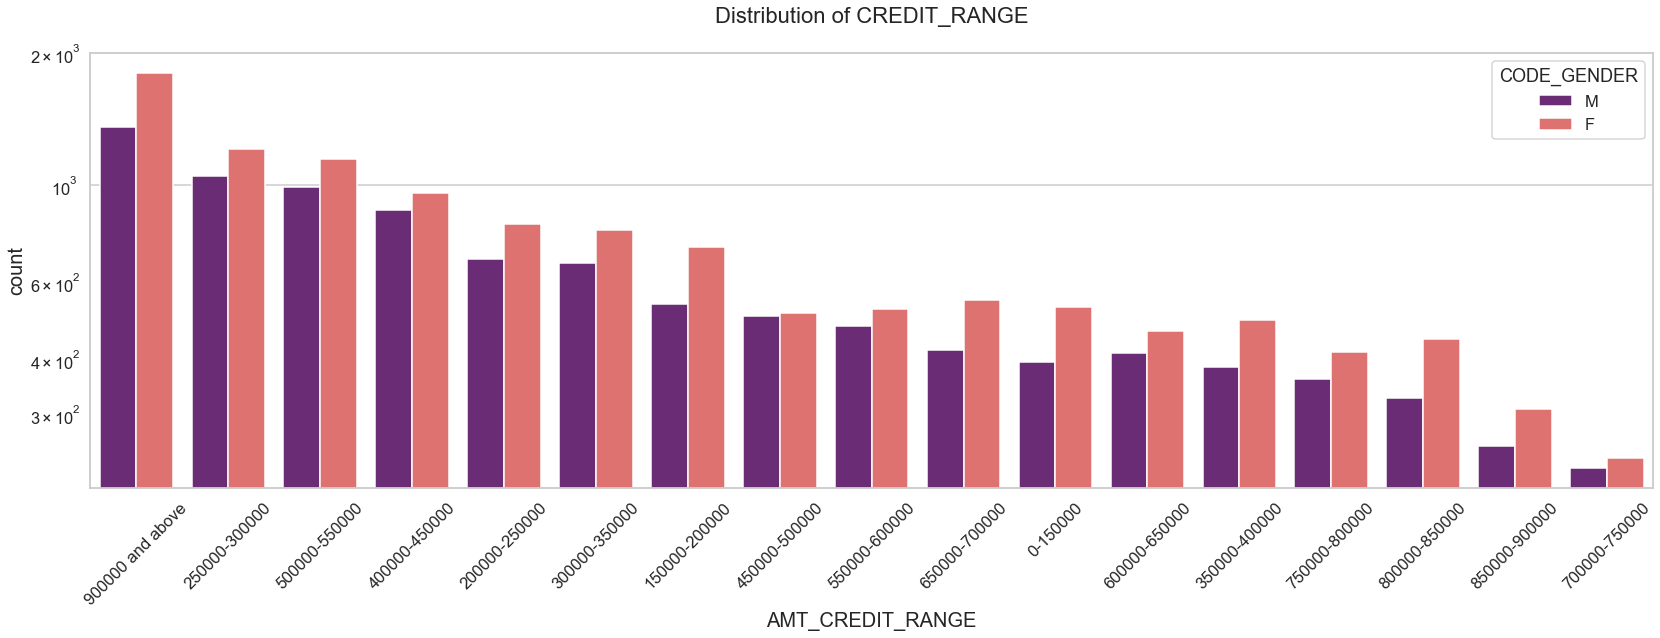

In [35]:
# PLotting for AMT_CREDIT_RANGE

uniplot(target1_df,col='AMT_CREDIT_RANGE',title='Distribution of CREDIT_RANGE',hue='CODE_GENDER')

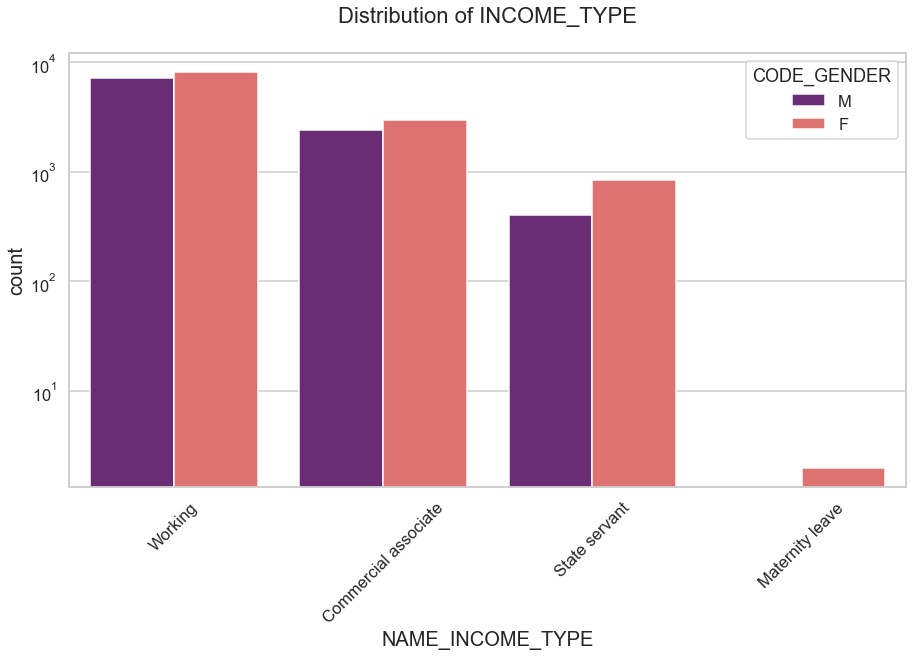

In [36]:
# Plotting for NAME_INCOME_TYPE

uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of INCOME_TYPE',hue='CODE_GENDER')

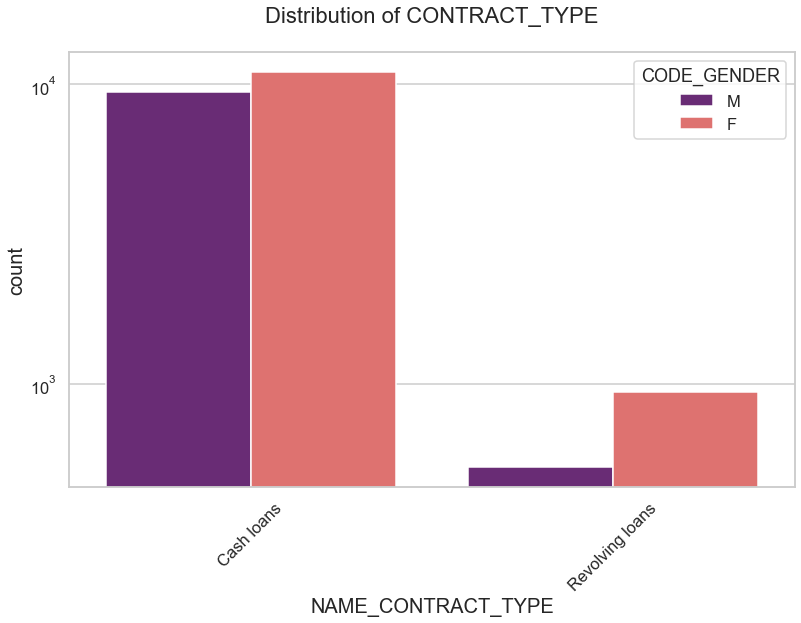

In [37]:
# Plotting for NAME_CONTRACT_TYPE

uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of CONTRACT_TYPE',hue='CODE_GENDER')

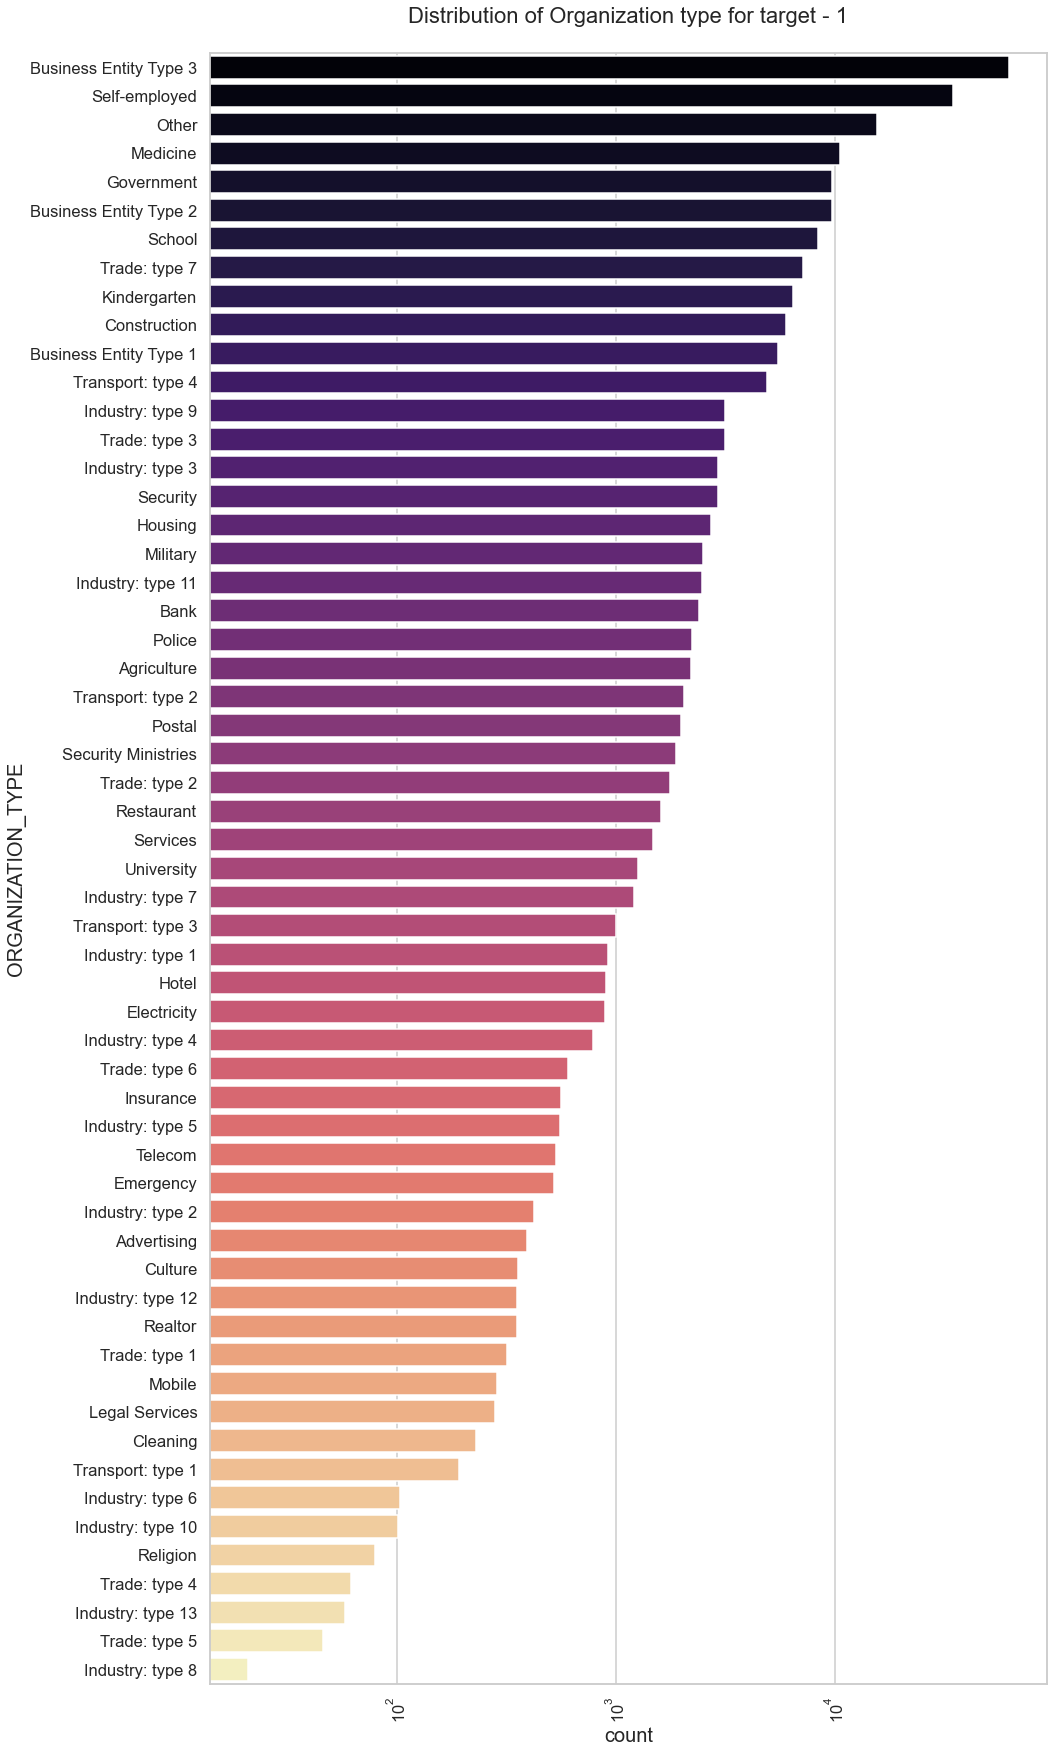

In [38]:
#Plotting for Orcganization type for Target-1

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='magma')

plt.show()

### Correlation for Target 0 and 1

In [39]:
# Finding correlation for columns for target 0 and 1 

target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')

In [40]:
# Correlation for target 0

target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,0.266534,0.030948,0.155518,-0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,-0.054666,-0.060868,0.040559,-0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,-0.169030,-0.104251,-0.015318,-0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,-0.100287,-0.074643,0.010712,-0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,-0.041663,0.000900,-0.042400,-0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,0.266534,-0.054666,-0.169030,-0.100287,-0.041663,1.000000,0.307787,0.265449,0.083331,0.051299,0.058627,0.038104,0.012789,0.167477,0.111539,0.029007
DAYS_EMPLOYED,0.030948,-0.060868,-0.104251,-0.074643,0.000900,0.307787,1.000000,0.126708,0.106823,0.026444,0.065435,0.086966,0.063533,0.118224,0.125954,0.069567
DAYS_REGISTRATION,0.155518,0.040559,-0.015318,0.010712,-0.042400,0.265449,0.126708,1.000000,0.036788,-0.029553,0.017715,0.015092,0.007716,0.038064,0.047339,0.027231
DAYS_ID_PUBLISH,-0.119164,-0.036702,-0.038197,-0.027354,-0.010299,0.083331,0.106823,0.036788,1.000000,0.008538,0.027302,0.020823,0.008525,0.054875,0.033427,0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,0.051299,0.026444,-0.029553,0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [41]:
#Correlation for target 1

target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,0.175025,0.006823,0.110854,-0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,-0.103026,-0.053798,0.011378,-0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,-0.200718,-0.107605,-0.021973,-0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,-0.100200,-0.060193,0.019762,-0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,-0.044444,-0.015246,-0.033490,-0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,0.175025,-0.103026,-0.200718,-0.100200,-0.044444,1.000000,0.256870,0.192350,0.146246,0.041994,0.046320,0.022208,0.000356,0.145884,0.096181,0.009633
DAYS_EMPLOYED,0.006823,-0.053798,-0.107605,-0.060193,-0.015246,0.256870,1.000000,0.086286,0.104244,0.010328,0.069566,0.082264,0.056081,0.118869,0.139863,0.069316
DAYS_REGISTRATION,0.110854,0.011378,-0.021973,0.019762,-0.033490,0.192350,0.086286,1.000000,0.061563,-0.044753,0.006362,0.000896,-0.001416,0.015831,0.039204,0.026105
DAYS_ID_PUBLISH,-0.091042,-0.051113,-0.065143,-0.044128,-0.017779,0.146246,0.104244,0.061563,1.000000,0.012709,0.024860,0.013162,0.002567,0.048184,0.015838,-0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,0.041994,0.010328,-0.044753,0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [42]:
# Now, plotting the above correlation with heat map 

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

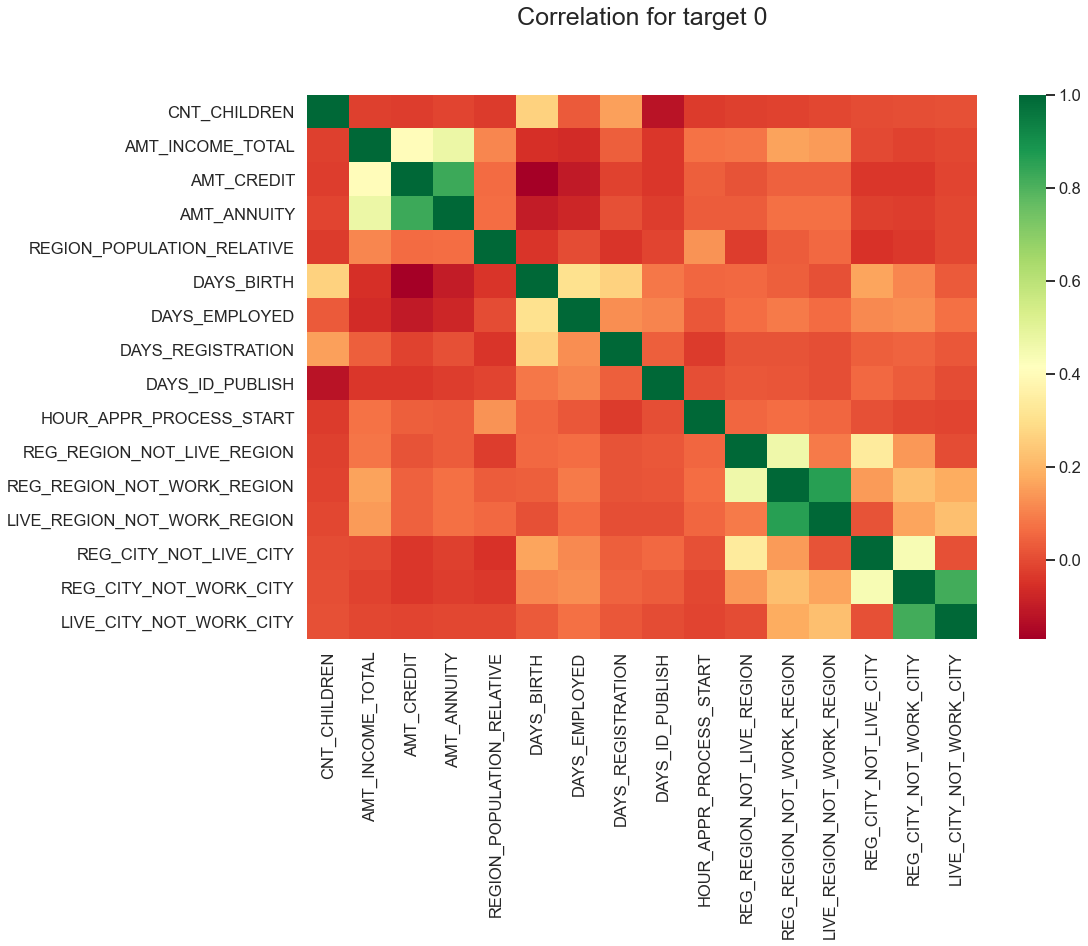

In [43]:
# For Target 0

targets_corr(data=target0,title='Correlation for target 0')

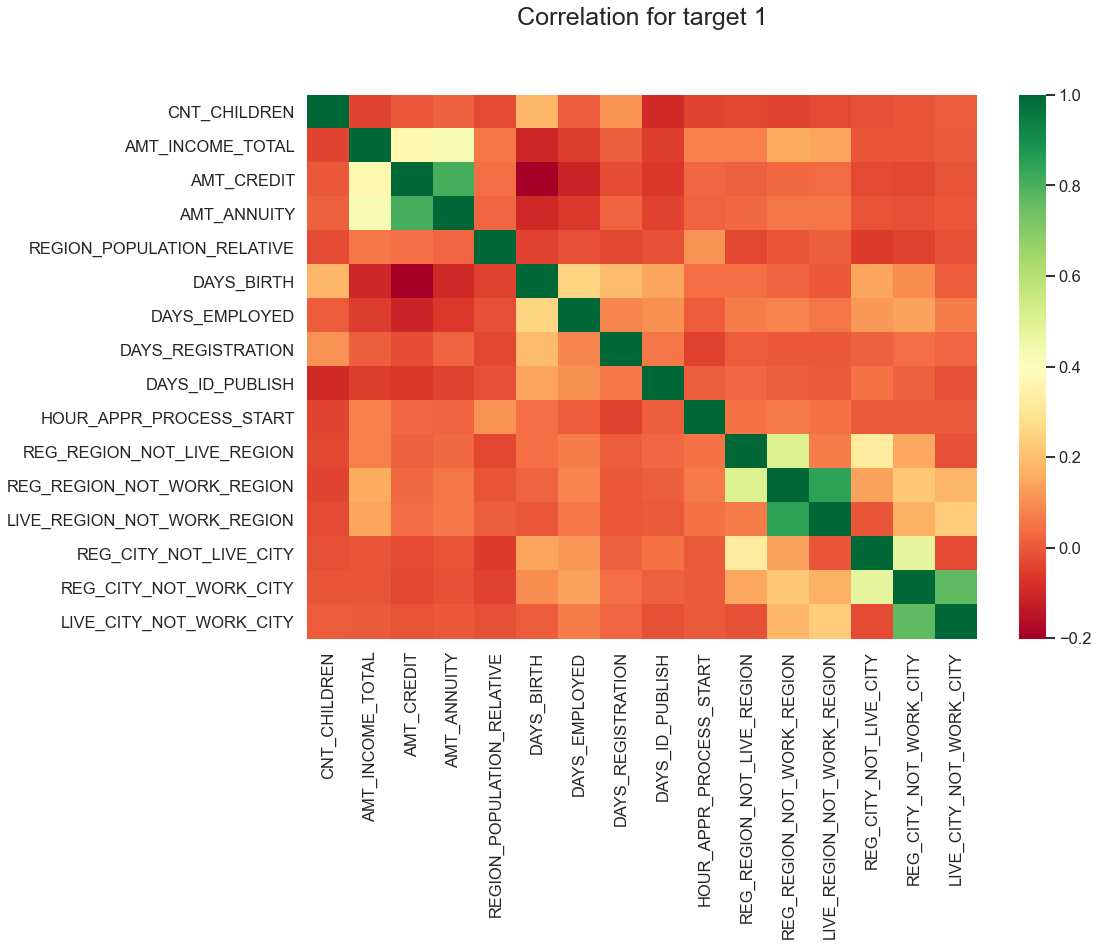

In [44]:
# For Target 1

targets_corr(data=target1,title='Correlation for target 1')

### Univariate Analysis for variables

In [45]:
# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, y=col,orient='v')
    plt.show()

#### Finding outliers using boxplot for Target 0

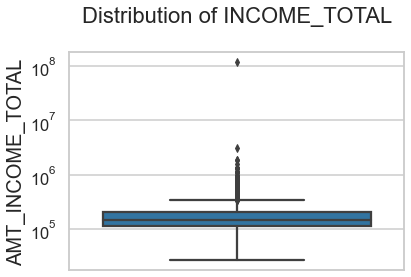

In [46]:
#Plot to see outliers in AMT_INCOME_TOTAL 

univariate_numerical(data=target0_df,col='AMT_INCOME_TOTAL',title='Distribution of INCOME_TOTAL')

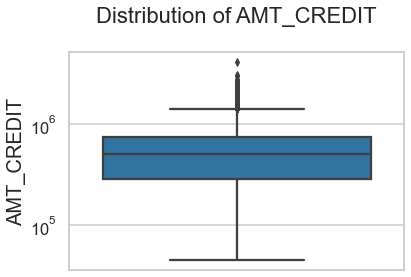

In [47]:
# Plot to see outliers in AMT_CREDIT 

univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of AMT_CREDIT')

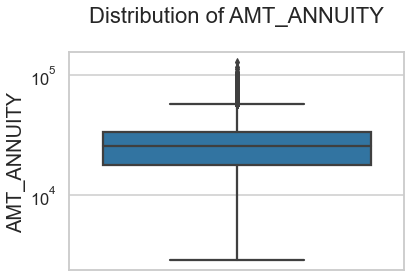

In [48]:
# Plot to see outliers in AMT_ANNUITY 

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of AMT_ANNUITY')

#### Finding outliers using boxplot for Target 1

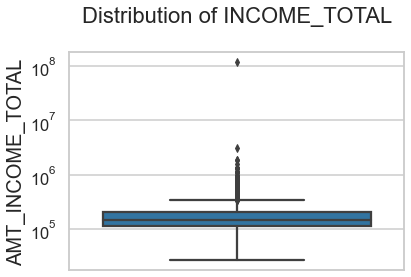

In [49]:
#Plot to see outliers in AMT_INCOME_TOTAL 

univariate_numerical(data=target1_df,col='AMT_INCOME_TOTAL',title='Distribution of INCOME_TOTAL')

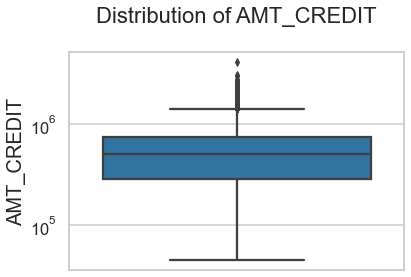

In [50]:
# Plot to see outliers in AMT_CREDIT 

univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of AMT_CREDIT')

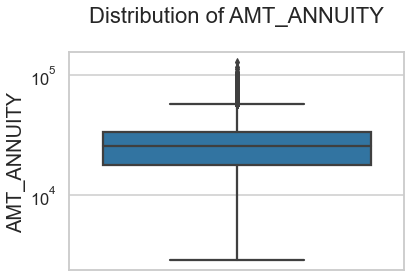

In [51]:
# Plot to see outliers in AMT_ANNUITY 

univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of AMT_ANNUITY')

### Bivariate analysis for continuous variables

#### Boxplot for Target 0

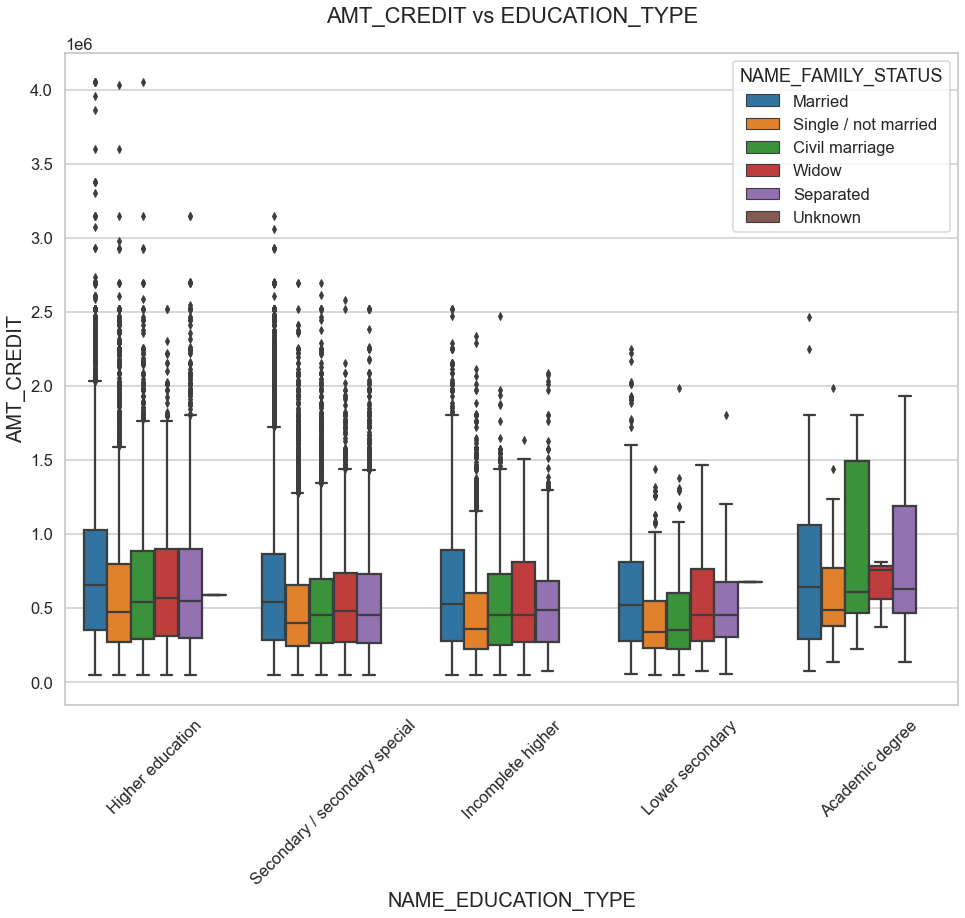

In [52]:
# Plot boxplot for AMT_CREDIT

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs EDUCATION_TYPE')
plt.show()

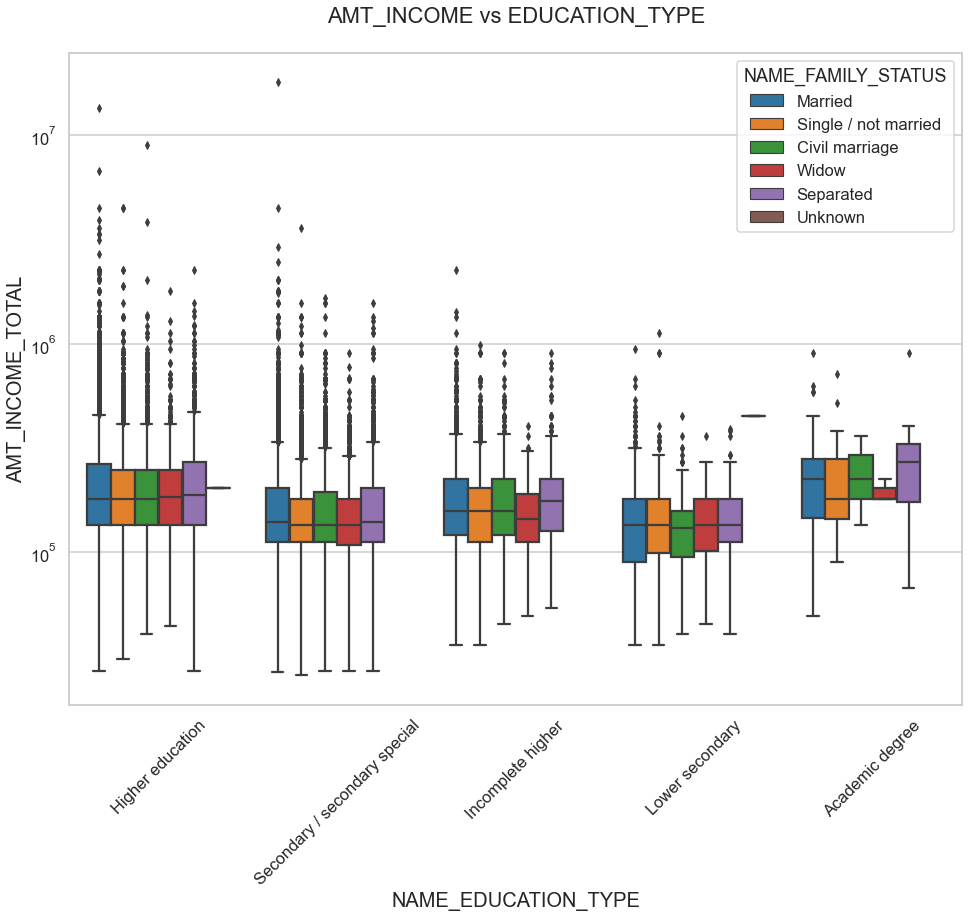

In [53]:
# Plot boxplot for AMT_INCOME

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME vs EDUCATION_TYPE')
plt.show()

#### Boxplot for Target 1

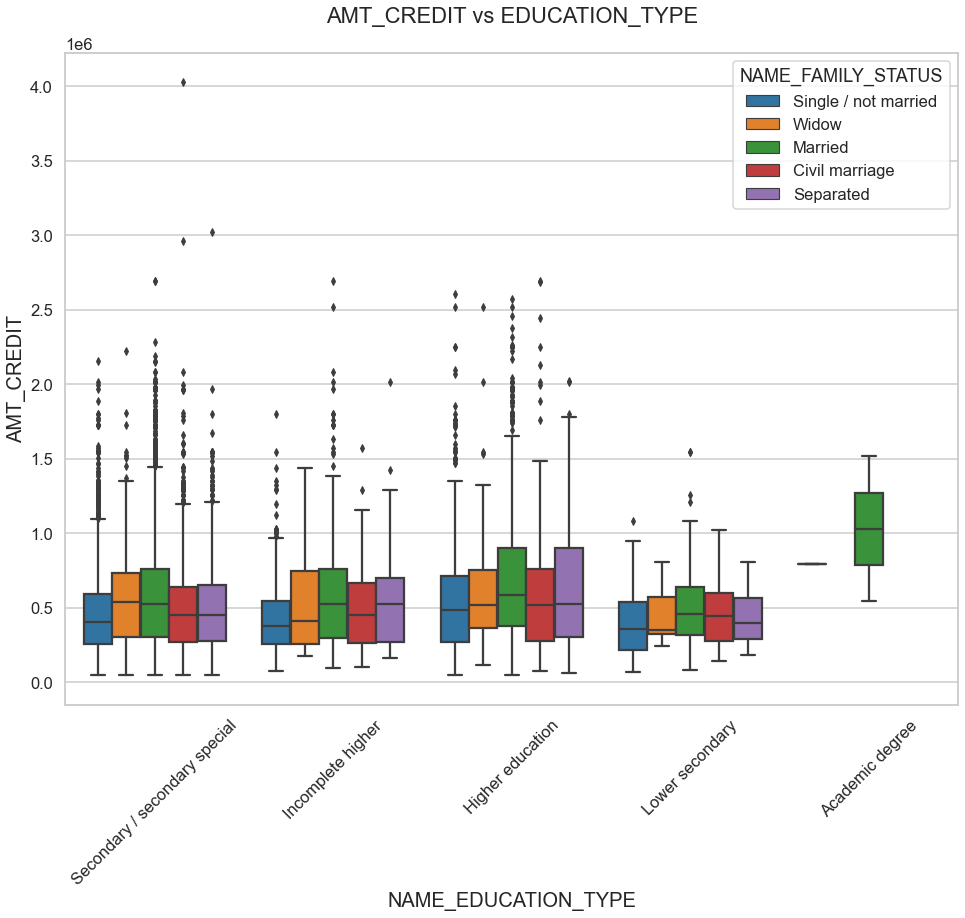

In [54]:
# Box plotting for AMT_CREDIT

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs EDUCATION_TYPE')
plt.show()

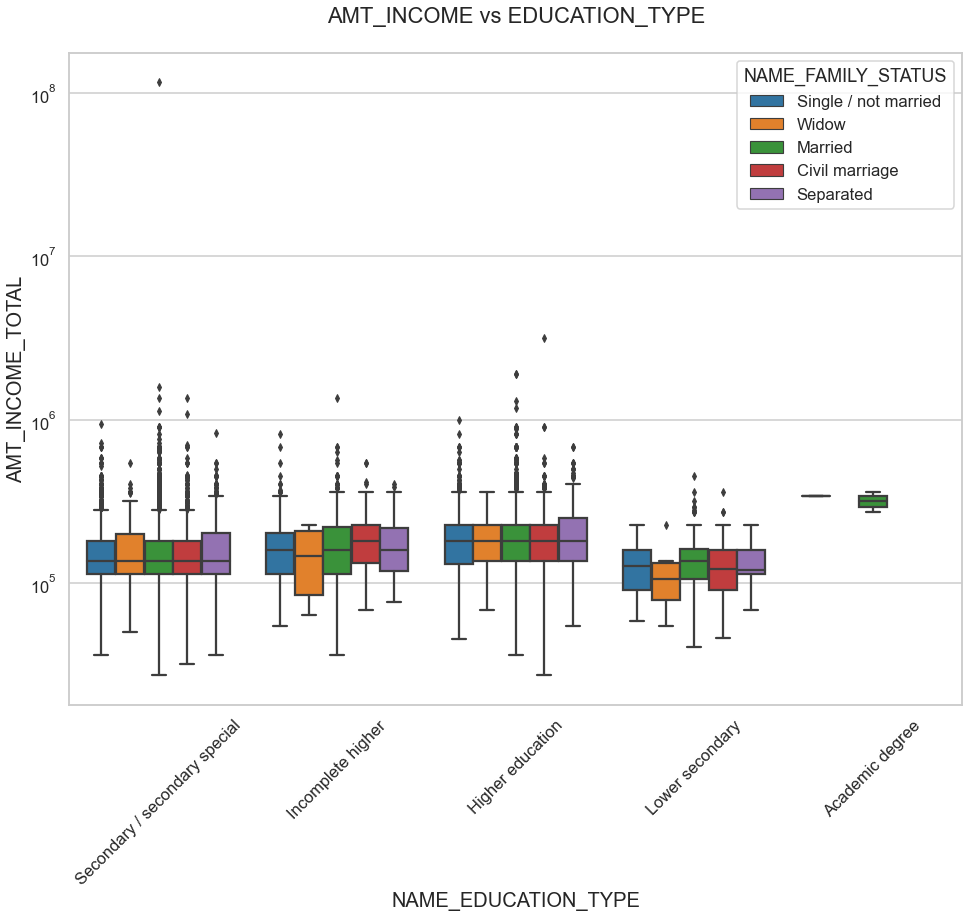

In [55]:
# Plot boxplot for AMT_INCOME

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_INCOME vs EDUCATION_TYPE')
plt.show()

In [56]:
df1 = pd.read_csv(r"C:\Users\nidhi_000\Downloads\previous_application.csv")
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
# Determining the shape of the datset

df1.shape

(1670214, 37)

In [58]:
# Cleaning the missing data

# Columns with null values having more than 50%

emptycol=df1.isnull().sum()
emptycol=emptycol[emptycol.values>(0.5*len(emptycol))]
len(emptycol)

15

In [59]:
# Removing those 15 columns

emptycol = list(emptycol[emptycol.values>=0.5].index)
df1.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

15


In [60]:
# Checking the columns having less null percentage(<30%)

df1.isnull().sum()/len(df1)*100

SK_ID_PREV                     0.00000
SK_ID_CURR                     0.00000
NAME_CONTRACT_TYPE             0.00000
AMT_APPLICATION                0.00000
AMT_CREDIT                     0.00006
WEEKDAY_APPR_PROCESS_START     0.00000
HOUR_APPR_PROCESS_START        0.00000
FLAG_LAST_APPL_PER_CONTRACT    0.00000
NFLAG_LAST_APPL_IN_DAY         0.00000
NAME_CASH_LOAN_PURPOSE         0.00000
NAME_CONTRACT_STATUS           0.00000
DAYS_DECISION                  0.00000
NAME_PAYMENT_TYPE              0.00000
CODE_REJECT_REASON             0.00000
NAME_CLIENT_TYPE               0.00000
NAME_GOODS_CATEGORY            0.00000
NAME_PORTFOLIO                 0.00000
NAME_PRODUCT_TYPE              0.00000
CHANNEL_TYPE                   0.00000
SELLERPLACE_AREA               0.00000
NAME_SELLER_INDUSTRY           0.00000
NAME_YIELD_GROUP               0.00000
dtype: float64

In [61]:
#Column for null values

df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     1
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [62]:
# finding particular row which is having missing value.

null_data = df1[df1.isnull().any(axis=1)]
null_data

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
1127152,2204450,438387,Revolving loans,0.0,NaN,FRIDAY,10,Y,1,XAP,...,XNA,XAP,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,XNA


In [63]:
# Dropped that particular row.

df1.drop(df1.iloc[1127152].name,  inplace=True)

In [64]:
# Finally there is no any missing value in the dataset.

df1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_APPLICATION                0
AMT_CREDIT                     0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
NAME_YIELD_GROUP               0
dtype: int64

In [65]:
# Count of uniques in NAME_CASH_LOAN_PURPOSE column

df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [66]:
# Updating the column 'NAME_CONTRACT_TYPE' with "Cash loans" for the dataset for the missing values

df1.loc[df1['NAME_CONTRACT_TYPE']=='XNA','NAME_CONTRACT_TYPE']='Cash loans'
df1['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         747899
Consumer loans     729151
Revolving loans    193163
Name: NAME_CONTRACT_TYPE, dtype: int64

In [67]:
# Count of uniques in NAME_PAYMENT_TYPE column

df1['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        1033552
XNA                                           627383
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [68]:
# Dropping the rows of total 627383 have 'XNA' values in the NAME_PAYMENT_TYPE column

df1=df1.drop(df1.loc[df1['NAME_PAYMENT_TYPE']=='XNA'].index)
df1[df1['NAME_PAYMENT_TYPE']=='XNA'].shape

(0, 22)

In [69]:
# Shape of dataset after dropping certain rows.

df1.shape

(1042830, 22)

In [70]:
# Count of uniques in CODE_REJECT_REASON column

df1['CODE_REJECT_REASON'].value_counts()

XAP       828213
HC        105862
LIMIT      44345
SCO        29916
CLIENT     25922
XNA         3563
VERIF       3113
SCOFR       1818
SYSTEM        78
Name: CODE_REJECT_REASON, dtype: int64

In [71]:
# Count of uniques in NAME_PORTFOLIO column

df1['NAME_PORTFOLIO'].value_counts()

POS     602802
Cash    402962
XNA      36696
Cars       370
Name: NAME_PORTFOLIO, dtype: int64

In [72]:
# Updating the column 'NAME_PORTFOLIO' with "POS" for the dataset for the missing values

df1.loc[df1['NAME_PORTFOLIO']=='XNA','NAME_PORTFOLIO']='POS'
df1['NAME_PORTFOLIO'].value_counts()

POS     639498
Cash    402962
Cars       370
Name: NAME_PORTFOLIO, dtype: int64

In [73]:
# Count of uniques in NAME_YIELD_GROUP column

df1['NAME_YIELD_GROUP'].value_counts()

middle        336677
high          306198
low_normal    279844
low_action     83415
XNA            36696
Name: NAME_YIELD_GROUP, dtype: int64

In [74]:
# Updating the column 'NAME_YIELD_GROUP' with "middle" for the dataset for the missing values

df1.loc[df1['NAME_YIELD_GROUP']=='XNA','NAME_YIELD_GROUP']='middle'
df1['NAME_YIELD_GROUP'].value_counts()

middle        373373
high          306198
low_normal    279844
low_action     83415
Name: NAME_YIELD_GROUP, dtype: int64

In [75]:
# Count of uniques in NAME_YIELD_GROUP column

df1['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 638596
XNA                                 340015
Repairs                              22150
Other                                14372
Urgent needs                          7726
Buying a used car                     2582
Building a house or an annex          2478
Everyday expenses                     2199
Medicine                              2032
Payments on other loans               1757
Education                             1488
Journey                               1138
Purchase of electronic equipment       965
Buying a new car                       886
Wedding / gift / holiday               883
Buying a home                          799
Car repairs                            717
Furniture                              694
Buying a holiday home / land           473
Business development                   392
Gasification / water supply            270
Buying a garage                        131
Hobby                                   50
Money for a

In [76]:
# Updating the column 'NAME_CASH_LOAN_PURPOSE' with "Not mentioned" for the dataset for the missing values

df1.loc[df1['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE']='Not mentioned'
df1['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 638596
Not mentioned                       340015
Repairs                              22150
Other                                14372
Urgent needs                          7726
Buying a used car                     2582
Building a house or an annex          2478
Everyday expenses                     2199
Medicine                              2032
Payments on other loans               1757
Education                             1488
Journey                               1138
Purchase of electronic equipment       965
Buying a new car                       886
Wedding / gift / holiday               883
Buying a home                          799
Car repairs                            717
Furniture                              694
Buying a holiday home / land           473
Business development                   392
Gasification / water supply            270
Buying a garage                        131
Hobby                                   50
Money for a

In [77]:
# Updating the column 'NAME_CASH_LOAN_PURPOSE' with "Not mentioned" for the dataset for the missing values

df1.loc[df1['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE']='Not mentioned'
df1['NAME_CASH_LOAN_PURPOSE'].value_counts()

Not mentioned                       978611
Repairs                              22150
Other                                14372
Urgent needs                          7726
Buying a used car                     2582
Building a house or an annex          2478
Everyday expenses                     2199
Medicine                              2032
Payments on other loans               1757
Education                             1488
Journey                               1138
Purchase of electronic equipment       965
Buying a new car                       886
Wedding / gift / holiday               883
Buying a home                          799
Car repairs                            717
Furniture                              694
Buying a holiday home / land           473
Business development                   392
Gasification / water supply            270
Buying a garage                        131
Hobby                                   50
Money for a third person                24
Refusal to 

In [78]:
# shape of dataset

df1.shape

(1042830, 22)

In [79]:
# Removing the unwanted columns from this dataset

unwanted = ['CODE_REJECT_REASON','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE','NAME_SELLER_INDUSTRY']
df1.drop(labels=unwanted,axis=1,inplace=True)

In [80]:
# Final shape of dataset after removing all the missing values.

df1.shape

(1042830, 18)

In [81]:
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,Not mentioned,Approved,-73,Cash through the bank,Repeater,POS,Country-wide,35,middle
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,Not mentioned,Approved,-301,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,Not mentioned,Approved,-512,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,low_normal


In [82]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [83]:
new_df.shape

(719156, 47)

In [84]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,NAME_CLIENT_TYPE,NAME_PORTFOLIO,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_YIELD_GROUP
0,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Not mentioned,Approved,-828,Cash through the bank,Refreshed,POS,Stone,1400,middle
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,1,Not mentioned,Approved,-2341,Cash through the bank,Refreshed,POS,Country-wide,200,middle
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,1,Not mentioned,Approved,-815,Cash through the bank,New,POS,Regional / Local,30,middle
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Not mentioned,Approved,-181,Cash through the bank,Repeater,Cash,Credit and cash offices,-1,low_normal
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,1,Not mentioned,Approved,-311,Cash through the bank,Repeater,POS,Country-wide,8025,high


In [85]:
# Renaming the column names after merging

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [86]:
# Removing unwanted columns for analysis

new_df1.drop(['SK_ID_CURR','SK_ID_PREV','SELLERPLACE_AREA','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [87]:
new_df1.shape

(719156, 32)

In [88]:
new_df1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'ORGANIZATION_TYPE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'NAME_CONTRACT_TYPE_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CHANNEL_TYPE', 'NAME_YIELD_GROUP'],
      dtype='object')

#### Performing univariate analysis

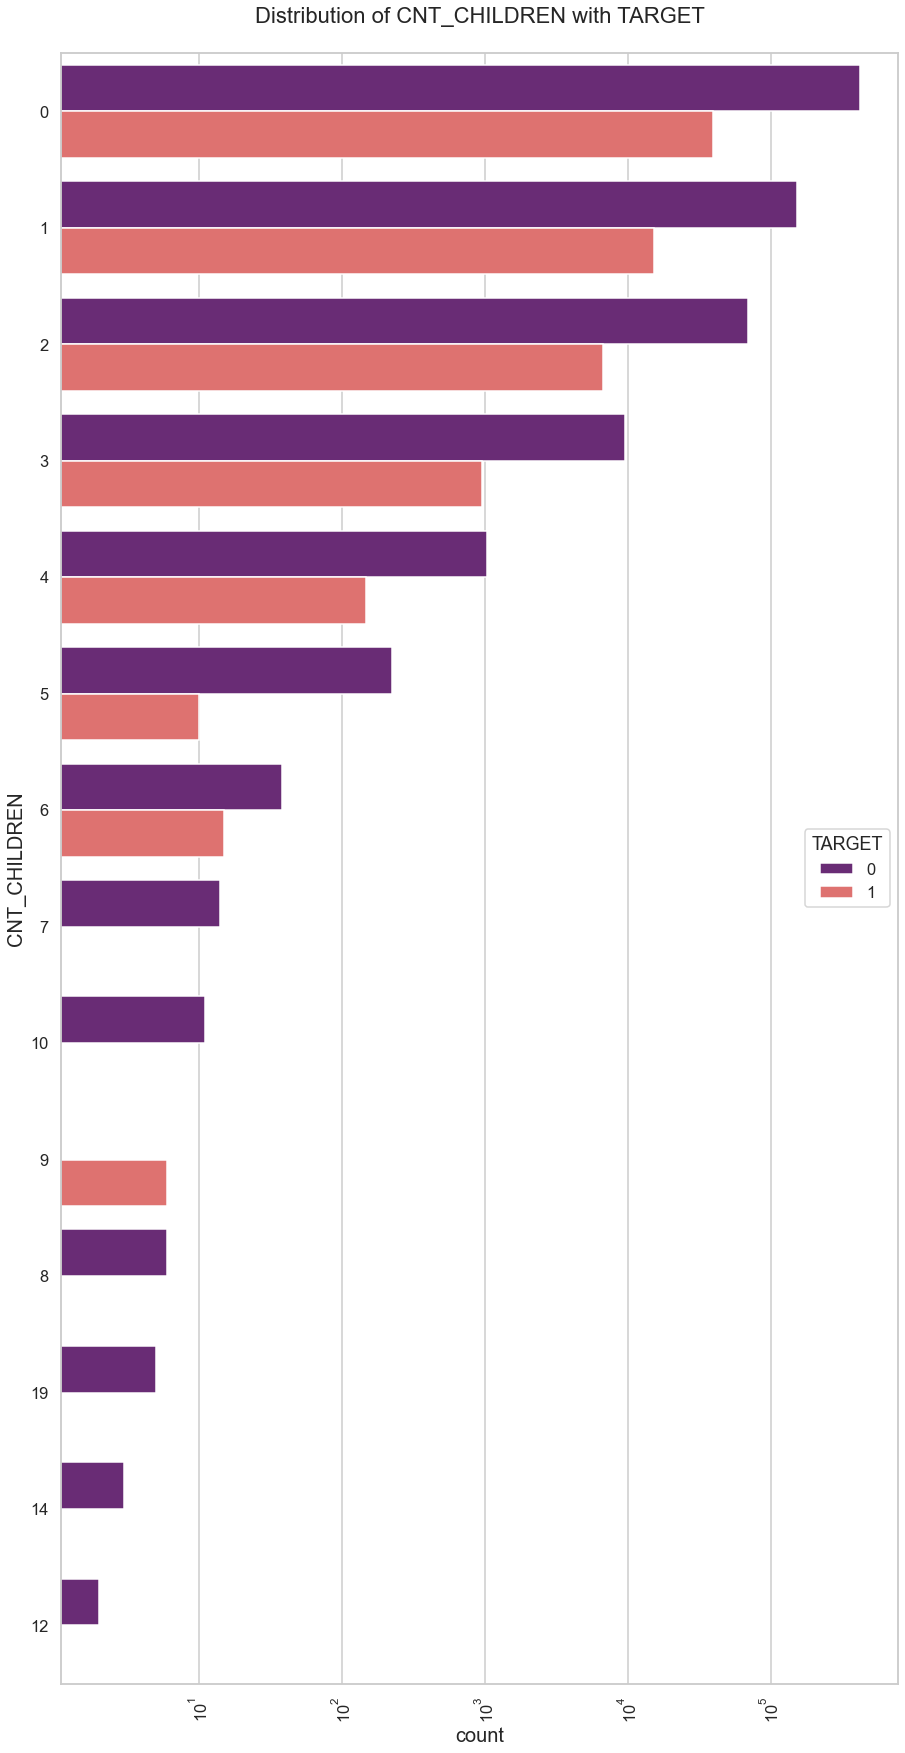

In [89]:
# Distribution of CNT_CHILDREN

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CNT_CHILDREN with TARGET')
ax = sns.countplot(data = new_df1, y= 'CNT_CHILDREN', 
                   order=new_df1['CNT_CHILDREN'].value_counts().index,hue = 'TARGET',palette='magma')

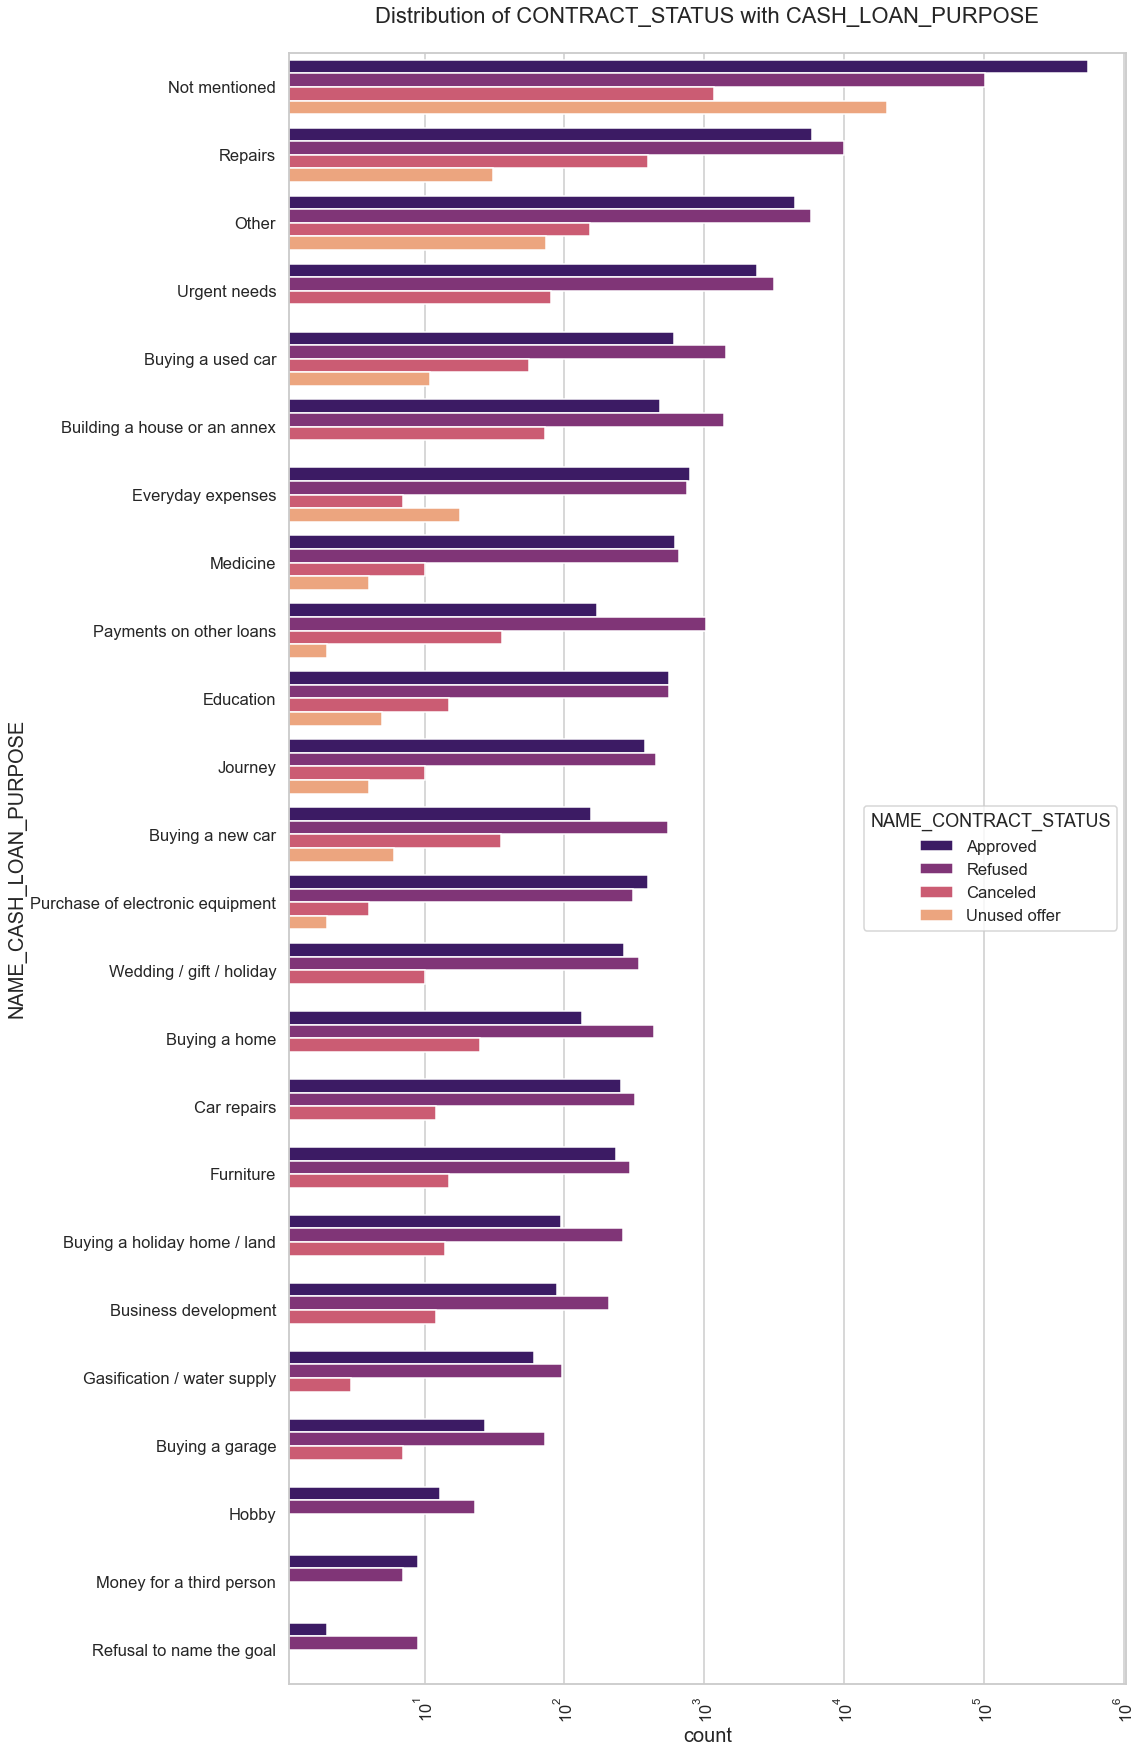

In [90]:
# Distribution of CONTRACT_STATUS with CASH_LOAN

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of CONTRACT_STATUS with CASH_LOAN_PURPOSE')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

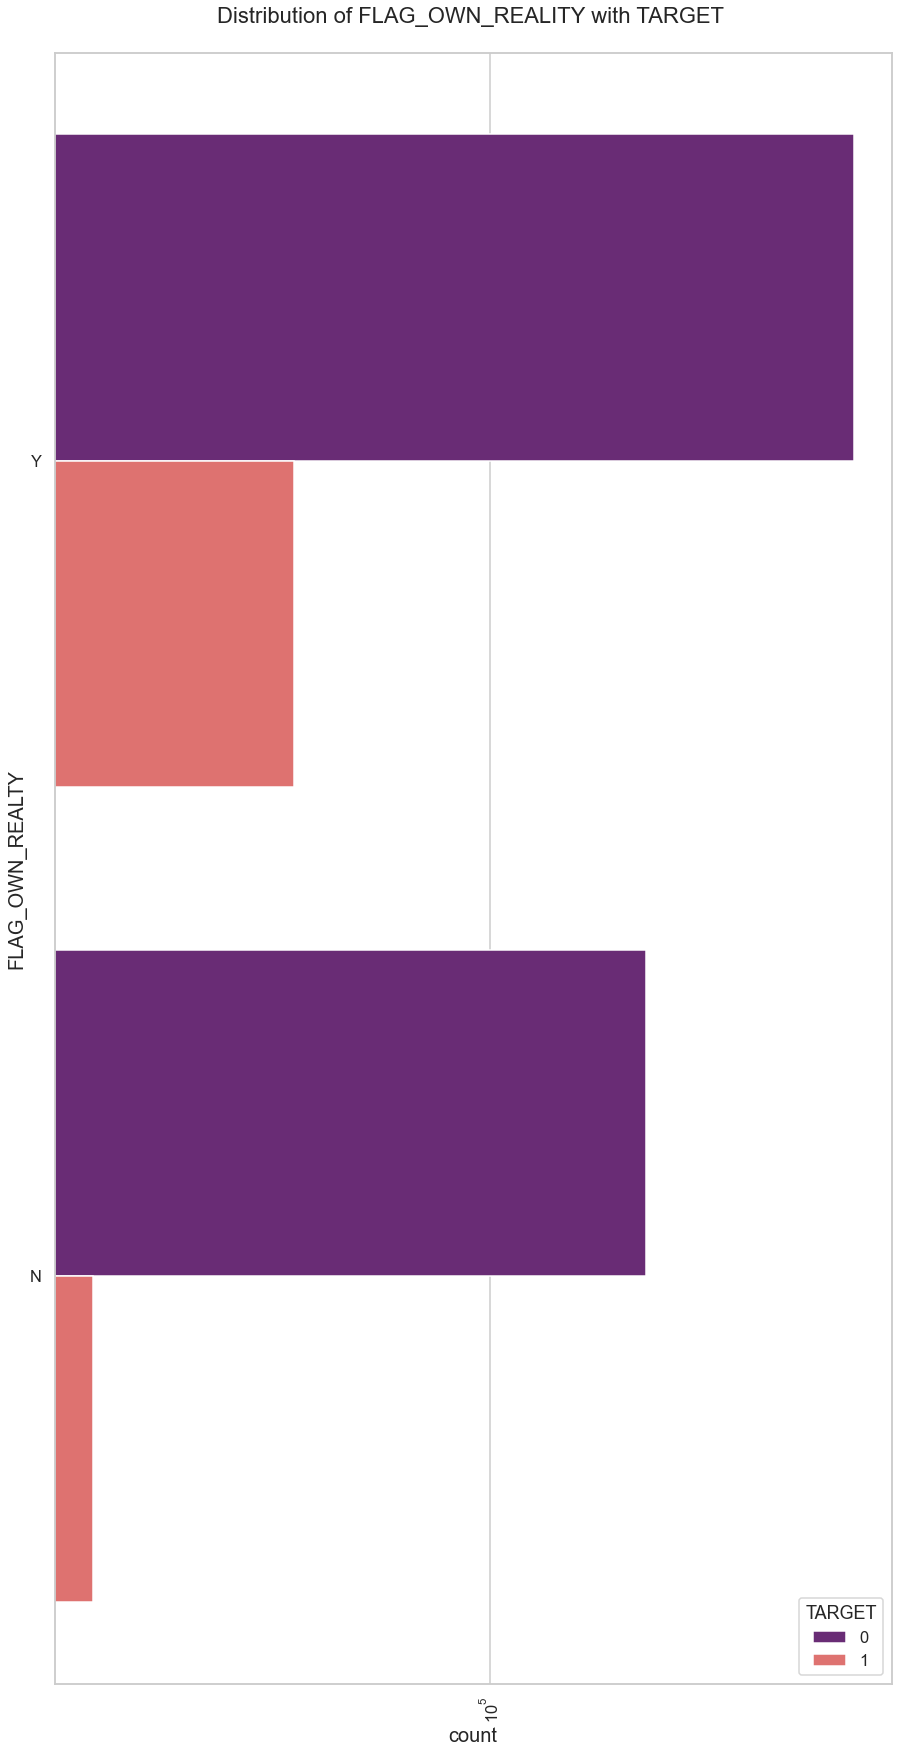

In [91]:
# Distribution of FLAG_OWN_REALITY with TARGET

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of FLAG_OWN_REALITY with TARGET ')
ax = sns.countplot(data = new_df1, y= 'FLAG_OWN_REALTY', 
                   order=new_df1['FLAG_OWN_REALTY'].value_counts().index,hue = 'TARGET',palette='magma')

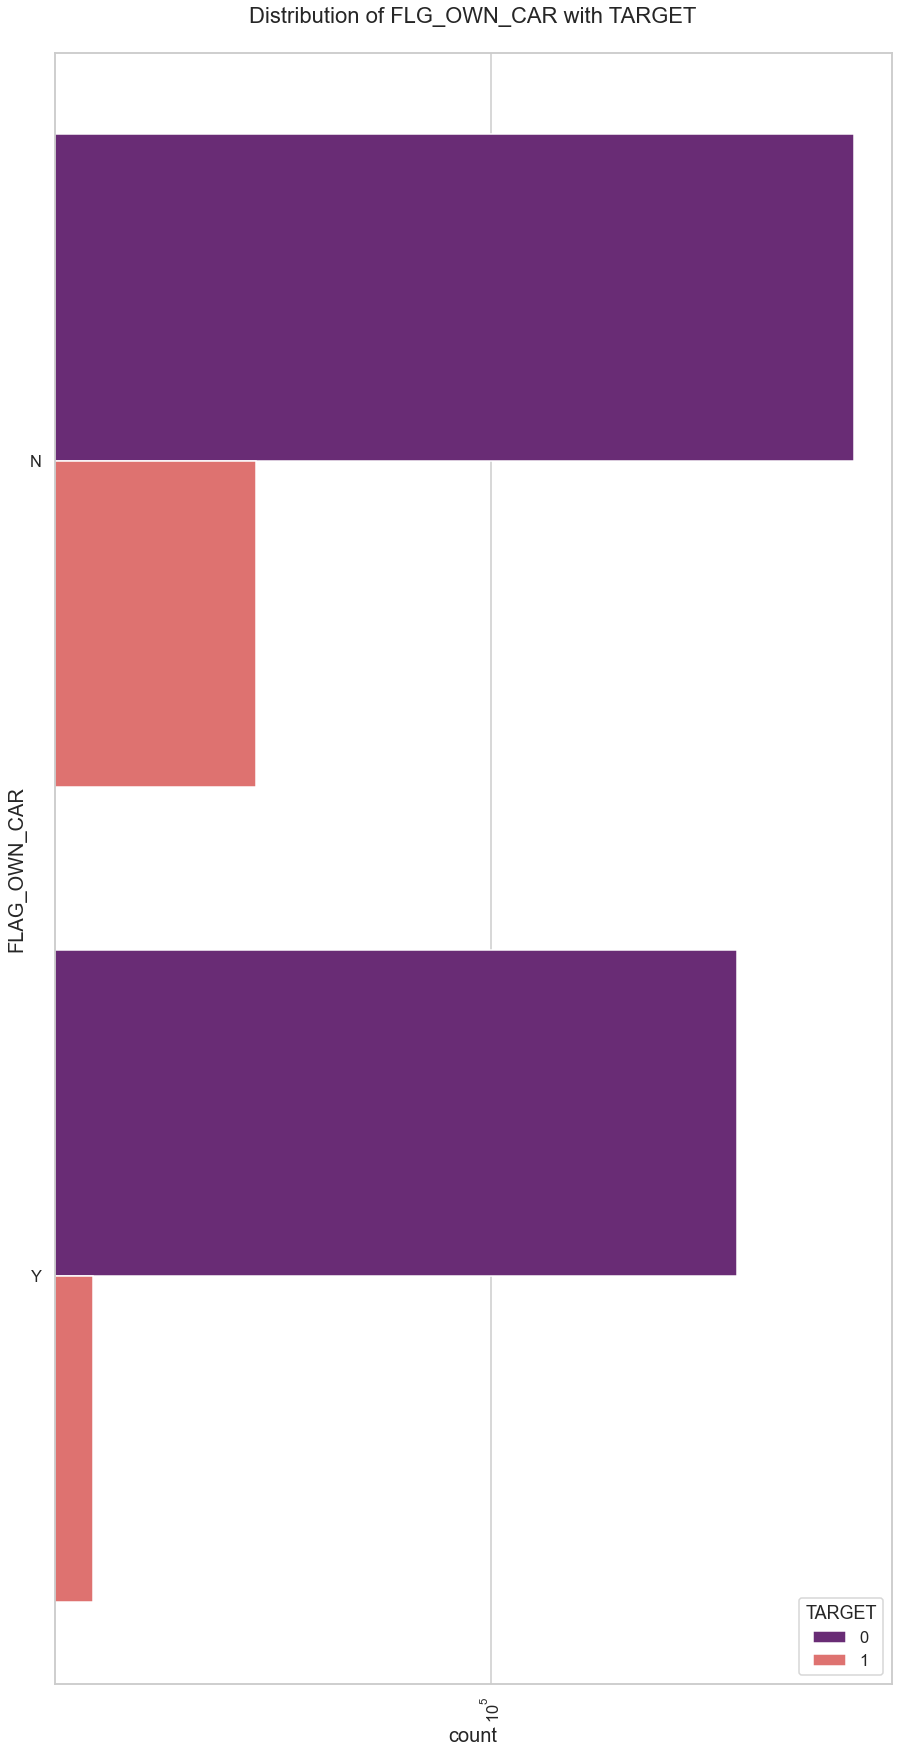

In [92]:
# Distribution of FLAG_OWN_CAR with TARGET

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of FLG_OWN_CAR with TARGET')
ax = sns.countplot(data = new_df1, y= 'FLAG_OWN_CAR', 
                   order=new_df1['FLAG_OWN_CAR'].value_counts().index,hue = 'TARGET',palette='magma')

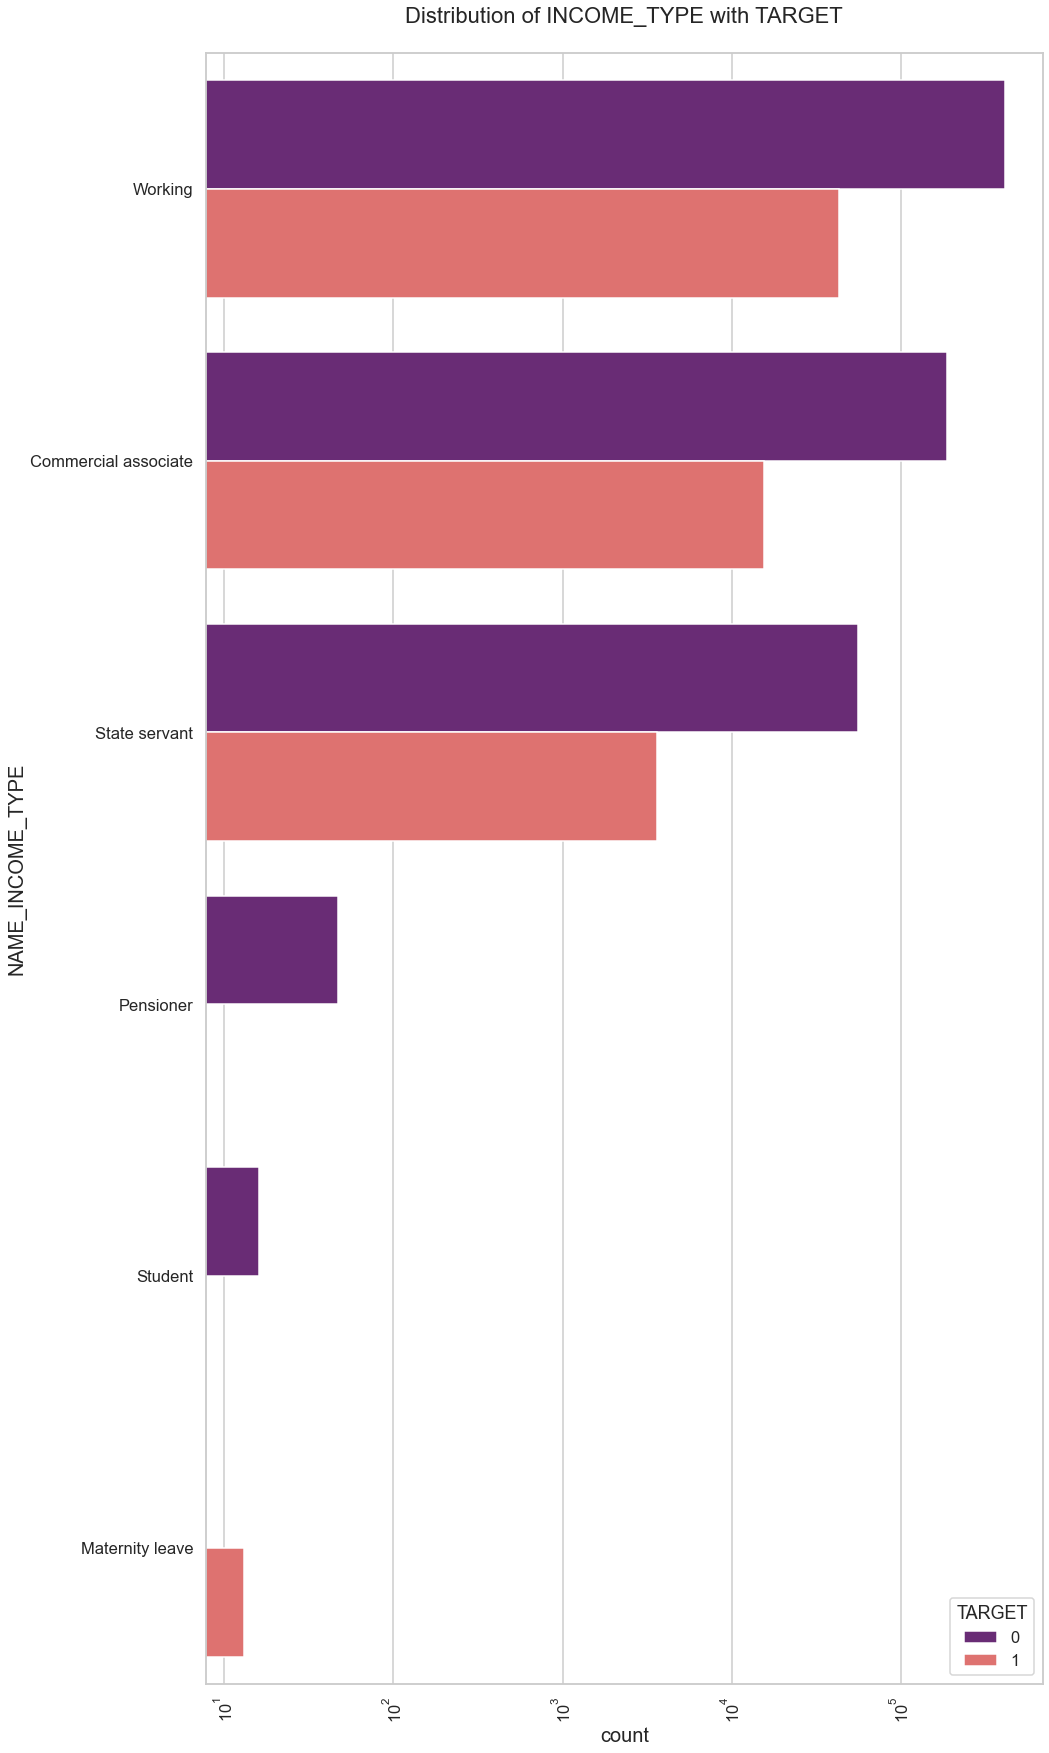

In [93]:
# Distribution of NAME_INCOME_TYPE with TARGET

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of INCOME_TYPE with TARGET')
ax = sns.countplot(data = new_df1, y= 'NAME_INCOME_TYPE', 
                   order=new_df1['NAME_INCOME_TYPE'].value_counts().index,hue = 'TARGET',palette='magma')

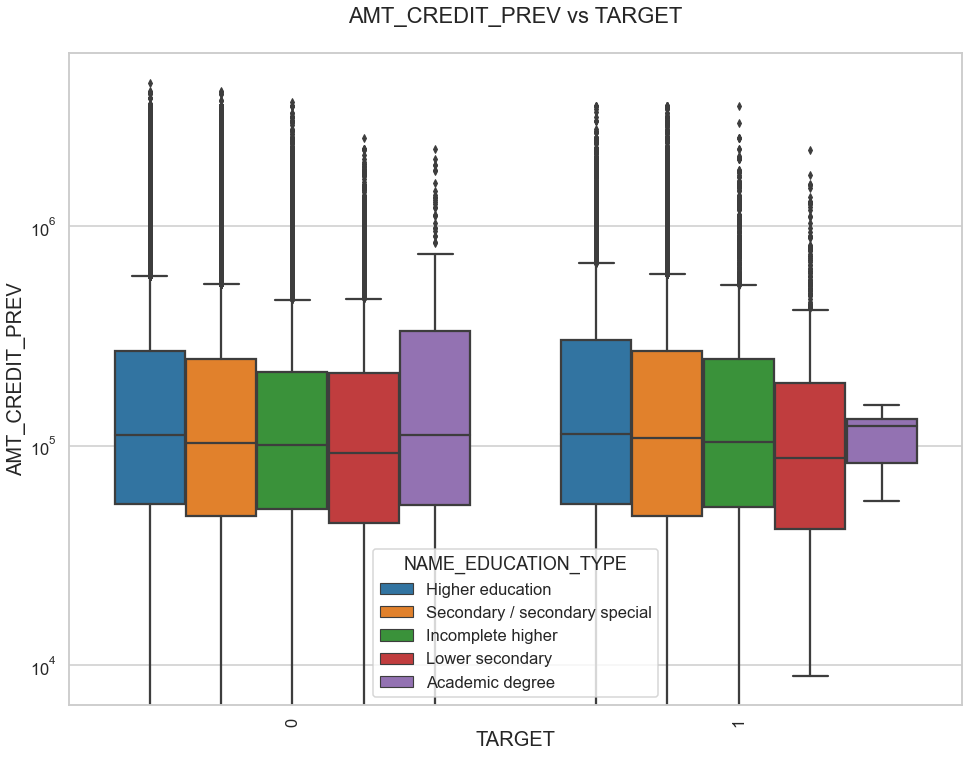

In [94]:
# Box plotting for AMT_CREDIT

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='TARGET',hue='NAME_EDUCATION_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('AMT_CREDIT_PREV vs TARGET')
plt.show()

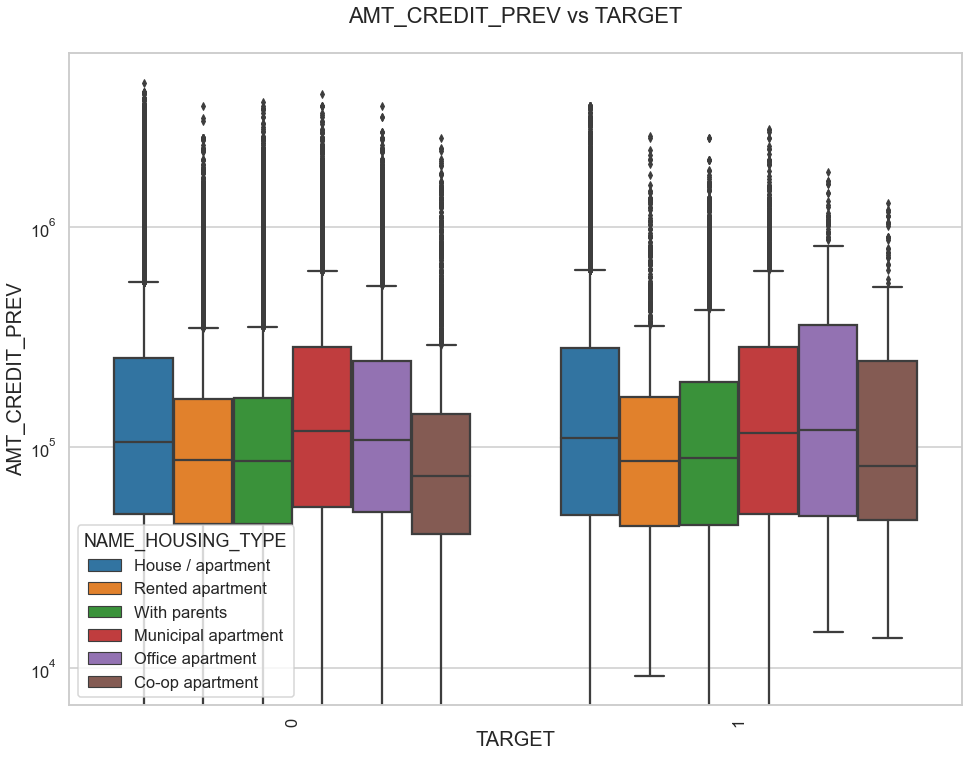

In [95]:
# Box plotting for AMT_CREDIT

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.boxplot(data =new_df1, x='TARGET',hue='NAME_HOUSING_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('AMT_CREDIT_PREV vs TARGET')
plt.show()

## CONCLUSION

#### Banks should focus more on contract type 'Student','pensioner' and 'Businessman' with housing type for successful payments.

#### Banks should focus on income type 'Working' as they are huge in number and their income is also high.

#### Bank should focus on the customers having less or no children.

#### Customer having their own house and without a car, they are least likely to be in the defaulter.

#### The female customer being in defaulter is less than compared to male so bank can focus on female customers.